In [22]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from keras.models import Sequential, model_from_json
from keras.layers import Dense, LSTM
from keras.layers.core import Dense, Dropout, Activation
import pandas as pd
import json, os
from matplotlib import pyplot as plt

In [23]:
def norm_data_f(data, colv):
    min_max_scaler = preprocessing.MinMaxScaler()
    data[colv] = min_max_scaler.fit_transform(data[colv].astype(float).values.reshape(-1,1))
    return data

def split_train_test(values):
    n_train_hours = int(len(values)*(2/3))
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    return [train_X,train_y,test_X,test_y]

def plot_acc(history, acc, val_acc):
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    ax1 = axes[0]; ax2 = axes[1]
    ax1.plot(history.history[acc], label='train')
    ax1.plot(history.history[val_acc], label='test')
    ax1.set_title('model accuracy')
    ax1.set_ylabel(acc)
    ax1.set_xlabel('epoch')
    ax1.legend()
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    ax2.legend(['train', 'test'])
    plt.tight_layout()
    plt.show()
    
def LSTM_MODEL (epochs, neurons, dropout, batch_size, train_X,train_y, test_X, test_y ):
    # default values: neurons=100;epochs=100;dropout=0.2;batch_size=200
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    return [model, history]

def save_model (model, history,cnt):
    history_dict = history.history; 
    fname = 'MODELS/history_' + str(cnt) + '.json'
    histfile = open(fname, 'w')
    json.dump(history_dict, histfile)
    histfile.close()
    model_json = model.to_json()
    mfname = 'MODELS/model_' + str(cnt) + '.json'
    mname = 'MODELS/model_' + str(cnt) + '.h5'
    with open(mfname, "w") as json_file:
        json_file.write(model_json)
    model.save_weights(mname)
    json_file.close()
    

In [24]:
training_data_path = 'datasets/training_datasets/Freeway12m_10months_1.csv'
merged_data = pd.read_csv(training_data_path)
merged_data.head()
col_types = [[ 'month','hour','dow','device_id','device_speed','meadianv','speed_2','INRIX_speed']] 
cnt = -1
neurons=10;epochs=50;dropout=0.2;batch_size=1000
for clx in col_types:
    cnt+=1
    new_col_data = merged_data[clx]
    for norm_col in clx: 
        new_col_data = norm_data_f(new_col_data, norm_col)
    values = new_col_data.values
    [train_X,train_y,test_X,test_y] = split_train_test(values)    
    [model, history] = LSTM_MODEL (epochs, neurons, dropout, batch_size,train_X,train_y, test_X, test_y )
    save_model (model,history,cnt)
    print('model ' + str(cnt) + ' completed ....')

/home/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(348109, 1, 7) (348109,) (174055, 1, 7) (174055,)
Train on 348109 samples, validate on 174055 samples
Epoch 1/50
 - 2s - loss: 0.1951 - mean_absolute_error: 0.1951 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 2/50
 - 1s - loss: 0.0902 - mean_absolute_error: 0.0902 - val_loss: 0.0276 - val_mean_absolute_error: 0.0276
Epoch 3/50
 - 2s - loss: 0.0744 - mean_absolute_error: 0.0744 - val_loss: 0.0270 - val_mean_absolute_error: 0.0270
Epoch 4/50
 - 2s - loss: 0.0581 - mean_absolute_error: 0.0581 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259
Epoch 5/50
 - 1s - loss: 0.0438 - mean_absolute_error: 0.0438 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 6/50
 - 1s - loss: 0.0345 - mean_absolute_error: 0.0345 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
Epoch 7/50
 - 1s - loss: 0.0311 - mean_absolute_error: 0.0311 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 8/50
 - 1s - loss: 0.0296 - mean_absolute_error: 0.0296 - val_loss: 0.0219 - val_mean_a

MODELS/history_5.json


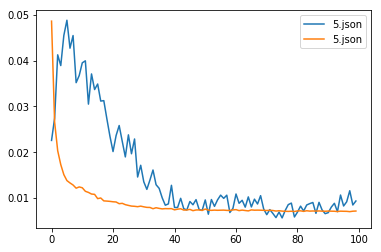

MODELS/history_3.json


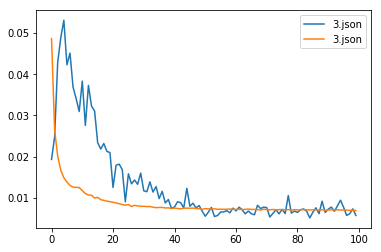

MODELS/history_1.json


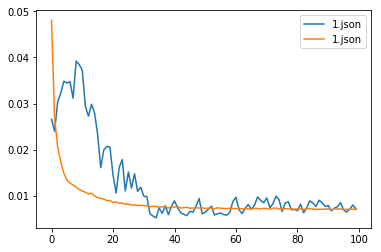

MODELS/history_4.json


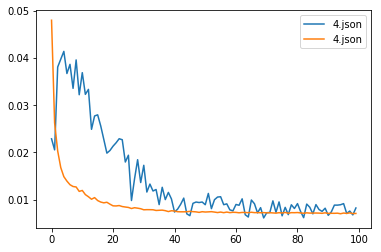

MODELS/history_0.json


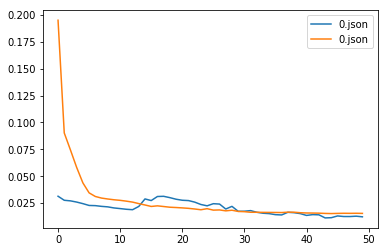

MODELS/history_2.json


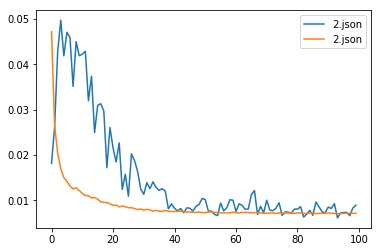

In [25]:
histFiles = os.listdir('MODELS')
for histFile in histFiles:
    if histFile.startswith('history'):
        jname = "MODELS/" + histFile.split('.')[0] + '.json'
        print (jname)
        json_file = open(jname, 'r')
        loaded_model_json = json.load(json_file)
        json_file.close()
        output = loaded_model_json['val_mean_absolute_error']
        output_main = loaded_model_json['mean_absolute_error']
        plt.plot(output, label=histFile.split('_')[1])
        plt.plot(output_main, label=histFile.split('_')[1])
        plt.legend()
        plt.show()

In [26]:
def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p

def denormalize(data_df, normalized_value):
    df = data_df['INRIX_speed'].values.reshape(-1,1) 
    normalized_value = normalized_value.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

def plot_results(model, x_testdata, y_testdata, filename):
    p = percentage_difference(model, x_testdata, y_testdata)
    data_read = pd.read_csv('datasets/test_datasets/Freeway12m_2months_1.csv')
    outx = denormalize(data_read, p)
    newy_test = denormalize(data_read, y_testdata)
    exp1=pd.DataFrame(outx,columns=['Prediction_speed'])
    exp2=pd.DataFrame(newy_test, columns=['Actual_speed'])
    exp=pd.concat([exp1, exp2], axis=1)
    exp.to_csv('results/' + filename + '.csv')
    print (abs(sum(newy_test-outx)/len(outx)))
    plt.plot(newy_test,color='blue', label='Actual')
    plt.plot(outx, color='red', label='Prediction')
    plt.show()
    

In [27]:
def get_test_data(values):
    n_train_hours = int(len(values)*(3/3))
    test = values[:n_train_hours, :]
    test_X, test_y = test[:, :-1], test[:, -1]
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return [test_X,test_y]

def test_data(test_data_path, new_cols, device_id):
    merged_data = pd.read_csv(test_data_path)
    merged_data = merged_data[new_cols]
    merged_data = merged_data[merged_data['device_id'] == device_id]
    for norm_col in new_cols: 
        print (norm_col)
        merged_data = norm_data_f(merged_data, norm_col)
    values_test = merged_data.values  
    [x_testdata,y_testdata]=get_test_data(values_test)
    return [x_testdata,y_testdata] 

1
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[0.58181649]


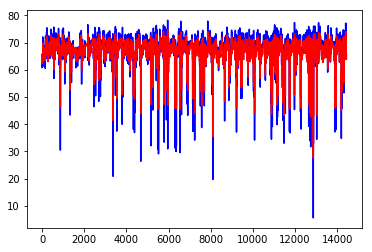

2
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[0.45620303]


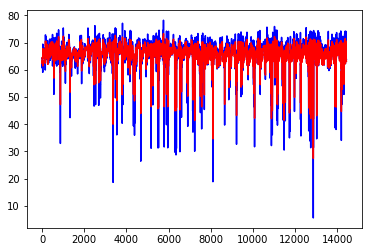

3
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[1.2036383]


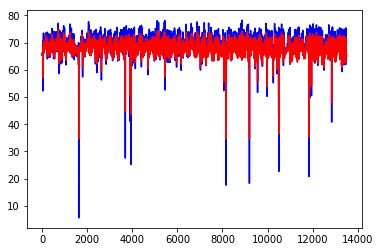

4
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[2.16491724]


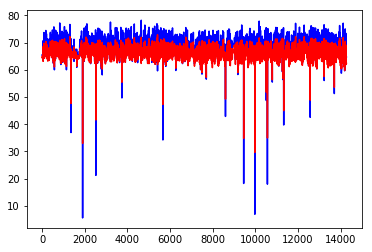

5
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[0.36401757]


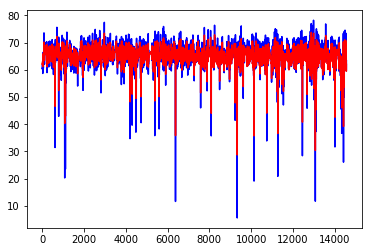

6
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[0.9556547]


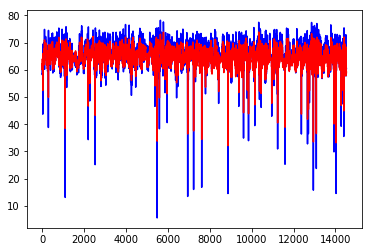

7
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[1.45828045]


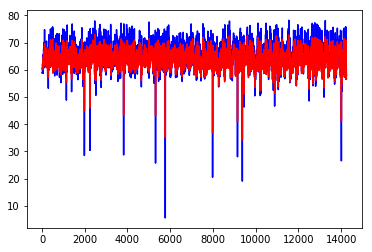

8
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[0.06860565]


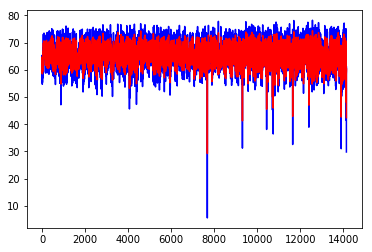

9
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[1.65296892]


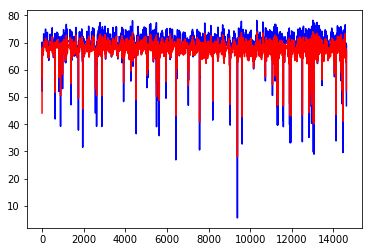

10
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[1.61633714]


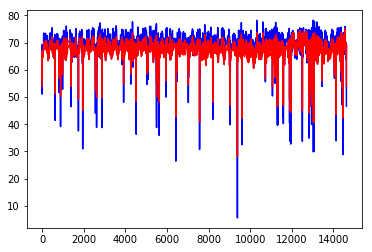

11
month
hour
dow
device_id
device_speed
meadianv
speed_2
INRIX_speed
MODELS/model_0.json
[1.86421889]


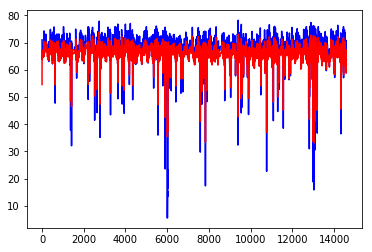

In [28]:
raw_test_data_path = 'datasets/test_datasets/Freeway12m_2months_1.csv'
filename = os.path.basename(raw_test_data_path).split('.csv')[0]
cnt = -1; device_ids = merged_data['device_id'].unique()
for new_cols in col_types:
    cnt+=1
    for device_id in device_ids:
        print (device_id)
        [x_testdata,y_testdata] = test_data(raw_test_data_path, new_cols, device_id) 
        jname = 'MODELS/model_' + str(cnt) + '.json'
        fname = 'MODELS/model_' + str(cnt) + '.h5'
        print (jname)
        json_file = open(jname, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        loaded_model.load_weights(fname)
        loaded_model.compile(loss='mae', optimizer='adam', metrics=['mae'])
        out_filename = filename+ '_'+str(device_id)
        plot_results(loaded_model, x_testdata, y_testdata,out_filename)